In [ ]:
#@title Instalar requerimientos
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
#@title  Montar Google Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title  Reorganizar dataset en subdirectorios
import os
import shutil

# Definir rutas del dataset
base_path = "/content/drive/MyDrive/Dataset_standar_procesado"
images_path = os.path.join(base_path, "images")
labels_path = os.path.join(base_path, "labels")

In [ ]:
#@title  Preparar el dataset para entrenamiento en formato YOLO
import random
import yaml

# Obtener todas las imágenes
image_files = [f for f in os.listdir(images_path) if f.endswith(".jpg")]
random.shuffle(image_files)  # Mezclar imágenes

# Dividir en entrenamiento (80%) y validación (20%)
split_index = int(0.8 * len(image_files))
train_files = image_files[:split_index]
val_files = image_files[split_index:]

# Guardar las listas de entrenamiento y validación
with open("train.txt", "w") as f:
    f.writelines([os.path.join(images_path, img) + "\n" for img in train_files])
with open("val.txt", "w") as f:
    f.writelines([os.path.join(images_path, img) + "\n" for img in val_files])

print(f"Dataset dividido: {len(train_files)} entrenamiento, {len(val_files)} validación")

Dataset dividido: 1087 entrenamiento, 272 validación


In [ ]:
#@title  Crear archivo dataset.yaml
# Definir archivo de configuración del dataset
yaml_dict = {
    "train": "train.txt",
    "val": "val.txt",
    "nc": 1,  # Número de clases (solo detectamos 'drone')
    "names": ["drone"]
}

with open("dataset.yaml", "w") as yaml_file:
    yaml.dump(yaml_dict, yaml_file, default_flow_style=False)
print("Archivo dataset.yaml creado.")

Archivo dataset.yaml creado.


In [ ]:
#@title  Entrenar modelo YOLO personalizado
from ultralytics import YOLO

# Cargar un modelo YOLO preentrenado y ajustarlo a nuestro dataset
model = YOLO("yolo11n.pt")

# Entrenar el modelo con nuestro dataset
results = model.train(data="/content/dataset.yaml", epochs=25, imgsz=512)
print("Entrenamiento completado.")

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/dataset.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

train: Scanning /content/drive/MyDrive/Dataset_standar_procesado/labels... 1087 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1087/1087 [00:08<00:00, 132.98it/s]


train: New cache created: /content/drive/MyDrive/Dataset_standar_procesado/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Dataset_standar_procesado/labels... 272 images, 0 backgrounds, 0 corrupt: 100%|██████████| 272/272 [00:02<00:00, 113.04it/s]


val: New cache created: /content/drive/MyDrive/Dataset_standar_procesado/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.98G      1.422       2.08      1.521         39        512: 100%|██████████| 68/68 [00:21<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.76it/s]

                   all        272        298      0.363      0.406      0.319      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.98G      1.473      1.639      1.527         37        512: 100%|██████████| 68/68 [00:20<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]


                   all        272        298      0.486      0.542      0.502      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.98G      1.559      1.615      1.585         40        512: 100%|██████████| 68/68 [00:21<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]


                   all        272        298      0.538      0.631      0.559      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.98G      1.525      1.498       1.55         49        512: 100%|██████████| 68/68 [00:19<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]


                   all        272        298      0.696      0.614      0.648      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.98G      1.476      1.324      1.496         40        512: 100%|██████████| 68/68 [00:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.35it/s]

                   all        272        298      0.825      0.631      0.748      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.98G      1.457      1.256      1.499         37        512: 100%|██████████| 68/68 [00:21<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.38it/s]


                   all        272        298      0.705      0.723      0.734      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.98G      1.441      1.223      1.467         43        512: 100%|██████████| 68/68 [00:21<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.12it/s]

                   all        272        298      0.746      0.681      0.759      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.98G        1.4      1.155      1.442         40        512: 100%|██████████| 68/68 [00:19<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        272        298      0.851      0.738      0.829      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.98G      1.413      1.125      1.448         38        512: 100%|██████████| 68/68 [00:22<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.62it/s]

                   all        272        298      0.867      0.826      0.902      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.98G      1.341      1.063      1.401         35        512: 100%|██████████| 68/68 [00:20<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.35it/s]

                   all        272        298      0.812      0.725      0.777      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         3G      1.336      1.027      1.393         44        512: 100%|██████████| 68/68 [00:18<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]

                   all        272        298      0.861      0.832      0.887      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         3G      1.324      1.012      1.382         40        512: 100%|██████████| 68/68 [00:20<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        272        298      0.891       0.85      0.915      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         3G      1.273     0.9808       1.36         49        512: 100%|██████████| 68/68 [00:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        272        298       0.94      0.891      0.949      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         3G      1.262     0.9488      1.344         48        512: 100%|██████████| 68/68 [00:19<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.55it/s]

                   all        272        298      0.901      0.913      0.936       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         3G      1.245      0.936      1.324         45        512: 100%|██████████| 68/68 [00:21<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        272        298      0.921      0.899      0.945      0.626


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         3G      1.157      0.848      1.323         16        512: 100%|██████████| 68/68 [00:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.02it/s]

                   all        272        298      0.877      0.863      0.915      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         3G      1.124     0.7293      1.316         15        512: 100%|██████████| 68/68 [00:20<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.70it/s]


                   all        272        298      0.899      0.921      0.942      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         3G      1.111     0.7216      1.325         15        512: 100%|██████████| 68/68 [00:19<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.64it/s]

                   all        272        298      0.886      0.896      0.947      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         3G      1.057     0.6541      1.282         15        512: 100%|██████████| 68/68 [00:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]

                   all        272        298      0.919      0.908       0.96      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         3G      1.062     0.6418       1.27         15        512: 100%|██████████| 68/68 [00:18<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]

                   all        272        298       0.95      0.906      0.969      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         3G       1.03     0.6124      1.252         15        512: 100%|██████████| 68/68 [00:20<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        272        298      0.952      0.899      0.964      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         3G      1.016     0.5892      1.223         15        512: 100%|██████████| 68/68 [00:19<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.72it/s]

                   all        272        298      0.918      0.935      0.965      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         3G     0.9818     0.5701      1.207         15        512: 100%|██████████| 68/68 [00:18<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        272        298      0.955      0.917       0.97      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         3G      0.976      0.547      1.195         15        512: 100%|██████████| 68/68 [00:20<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.11it/s]

                   all        272        298      0.969      0.933      0.973      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         3G     0.9235     0.5121       1.17         15        512: 100%|██████████| 68/68 [00:18<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        272        298      0.962      0.924       0.97      0.692



25 epochs completed in 0.167 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.4MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.07it/s]


                   all        272        298      0.969      0.933      0.973      0.697
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train3
Entrenamiento completado.


In [ ]:
#@title Evaluar el modelo entrenado en un subconjunto de 50 imágenes
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Seleccionar un subconjunto de 50 imágenes para evaluar
subset_size = 200
selected_indices = random.sample(range(len(image_files)), min(subset_size, len(image_files)))
selected_images = [os.path.join(images_path, image_files[i]) for i in selected_indices]

# Inferencia con el modelo entrenado
results_list = []
for img_path in selected_images:
    results = model(img_path)
    results_list.append(results[0])

print("Inferencia completada para evaluación.")


image 1/1 /content/drive/MyDrive/Dataset_modulo/images/0372.jpg: 640x640 (no detections), 138.6ms
Speed: 43.0ms preprocess, 138.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_modulo/images/1306.jpg: 640x640 (no detections), 34.1ms
Speed: 5.0ms preprocess, 34.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_modulo/images/0185.jpg: 640x640 (no detections), 27.3ms
Speed: 17.6ms preprocess, 27.3ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_modulo/images/0650.jpg: 640x640 (no detections), 17.0ms
Speed: 4.1ms preprocess, 17.0ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Dataset_modulo/images/0098.jpg: 640x640 (no detections), 38.9ms
Speed: 4.3ms preprocess, 38.9ms inference, 14.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/

Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/Dataset_standar_procesado/labels.cache... 272 images, 0 backgrounds, 0 corrupt: 100%|██████████| 272/272 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.11it/s]


                   all        272        298      0.968      0.933      0.972      0.697
Speed: 0.9ms preprocess, 5.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train32
Precisión: 0.968
Recall: 0.933
mAP@50: 0.972
mAP@50-95: 0.697


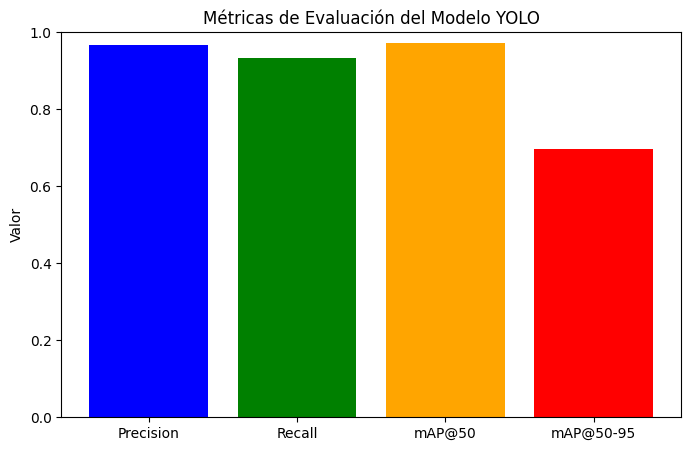

Evaluación de métricas completada.


In [ ]:
#@title Evaluar métricas de rendimiento del modelo YOLO
import matplotlib.pyplot as plt
import numpy as np

# Obtener métricas de evaluación
evaluation_results = model.val()

# Extraer métricas correctamente
precision = evaluation_results.results_dict['metrics/precision(B)']
recall = evaluation_results.results_dict['metrics/recall(B)']
map50 = evaluation_results.results_dict['metrics/mAP50(B)']  # Corregido
map50_95 = evaluation_results.results_dict['metrics/mAP50-95(B)']  # Corregido

# Mostrar resultados
print(f"Precisión: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"mAP@50: {map50:.3f}")
print(f"mAP@50-95: {map50_95:.3f}")

# Graficar métricas
metrics = ['Precision', 'Recall', 'mAP@50', 'mAP@50-95']
values = [precision, recall, map50, map50_95]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.ylabel("Valor")
plt.title("Métricas de Evaluación del Modelo YOLO")
plt.show()

print("Evaluación de métricas completada.")

In [ ]:
#@title Guardar el modelo

from google.colab import drive
import shutil
import os

# Ruta donde se guarda el modelo entrenado en Colab
model_path = "/content/runs/detect/train3/weights/best.pt"

# Ruta de destino en Google Drive
save_path = "/content/drive/MyDrive/Dataset_standar_procesado/Model"

# Crear el directorio si no existe
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Copiar el modelo a Google Drive
shutil.copy(model_path, save_path)

print(f"Modelo guardado en {save_path}")

Modelo guardado en /content/drive/MyDrive/Dataset_standar_procesado/Model


In [ ]:
#@title Cargar modelo entrenado
from ultralytics import YOLO
# Ruta del modelo guardado en Drive
model_path = "/content/drive/MyDrive/Dataset_standar_procesado/Model/best.pt"
# Cargar el modelo
model = YOLO(model_path)


image 1/1 /content/drive/MyDrive/Dataset_standar_procesado/images/0001.jpg: 256x512 5 drones, 118.3ms
Speed: 1.3ms preprocess, 118.3ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 512)


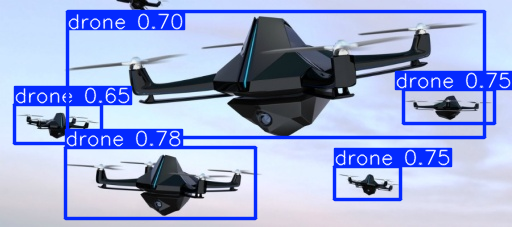

In [ ]:
#@title Probar el modelo con una imagen
results = model("/content/drive/MyDrive/Dataset_standar_procesado/images/0001.jpg")
# Mostrar resultados
results[0].show()

In [ ]:
#@title Calculo de metricas
import time
# Calcular F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Medir FPS y Latencia en inferencia
num_samples = 50  # Número de imágenes de prueba
image_files = [f for f in os.listdir(images_path) if f.endswith(".jpg")]
selected_images = np.random.choice(image_files, min(num_samples, len(image_files)), replace=False)

total_time = 0
for img_name in selected_images:
    img_path = os.path.join(images_path, img_name)
    start_time = time.time()
    _ = model(img_path)  # Inferencia
    total_time += time.time() - start_time

latency = (total_time / num_samples) * 1000  # ms por imagen
fps = num_samples / total_time  # Frames por segundo

# Mostrar métricas
print(f"F1-Score: {f1_score:.3f}")
print(f"FPS (Frames per Second): {fps:.2f}")
print(f"Latencia promedio: {latency:.2f} ms")

# Graficar métricas
metrics = [precision, recall, map50, map50_95, f1_score, fps]
names = ["Precision", "Recall", "mAP@50", "mAP@50-95", "F1-Score", "FPS"]
colors = ["blue", "green", "orange", "red", "purple", "cyan"]

plt.figure(figsize=(10, 6))
plt.bar(names, metrics, color=colors)
plt.ylabel("Valor")
plt.title("Métricas de Evaluación del Modelo YOLO")
plt.ylim(0, 1.2 if fps < 1 else fps * 1.2)
plt.show()